In [2]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator

2023-03-03 22:00:55.074905: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-03 22:00:55.476975: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-03 22:00:55.604774: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-03 22:00:55.604818: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [6]:
# Define data paths
train_dir = '/home/local/ZOHOCORP/kishore-pt5635/Desktop/College/PaddyDisease/DataSets/Image_Validation/Train'
validation_dir = '/home/local/ZOHOCORP/kishore-pt5635/Desktop/College/PaddyDisease/DataSets/Image_Validation/validation'

In [7]:
# Define image parameters
IMG_SIZE = 128
BATCH_SIZE = 32

In [11]:
# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(IMG_SIZE, IMG_SIZE),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)
val_generator = validation_datagen.flow_from_directory(validation_dir,
                                                        target_size=(IMG_SIZE, IMG_SIZE),
                                                        batch_size=BATCH_SIZE,
                                                        class_mode='binary')

Found 7076 images belonging to 2 classes.
Found 1512 images belonging to 2 classes.


In [12]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=val_generator)

Epoch 1/30
222/222 [==============================] - 49s 216ms/step - loss: 0.0995 - accuracy: 0.9647 - val_loss: 0.0175 - val_accuracy: 0.9947
Epoch 2/30
222/222 [==============================] - 52s 232ms/step - loss: 0.0408 - accuracy: 0.9891 - val_loss: 0.0265 - val_accuracy: 0.9934
Epoch 3/30
222/222 [==============================] - 46s 205ms/step - loss: 0.0262 - accuracy: 0.9924 - val_loss: 0.0137 - val_accuracy: 0.9960
Epoch 4/30
222/222 [==============================] - 45s 201ms/step - loss: 0.0237 - accuracy: 0.9938 - val_loss: 0.0099 - val_accuracy: 0.9974
Epoch 5/30
222/222 [==============================] - 53s 240ms/step - loss: 0.0191 - accuracy: 0.9939 - val_loss: 0.0058 - val_accuracy: 0.9980
Epoch 6/30
222/222 [==============================] - 51s 232ms/step - loss: 0.0261 - accuracy: 0.9918 - val_loss: 0.2252 - val_accuracy: 0.9352
Epoch 7/30
222/222 [==============================] - 56s 250ms/step - loss: 0.0275 - accuracy: 0.9922 - val_loss: 0.0045 - val_ac

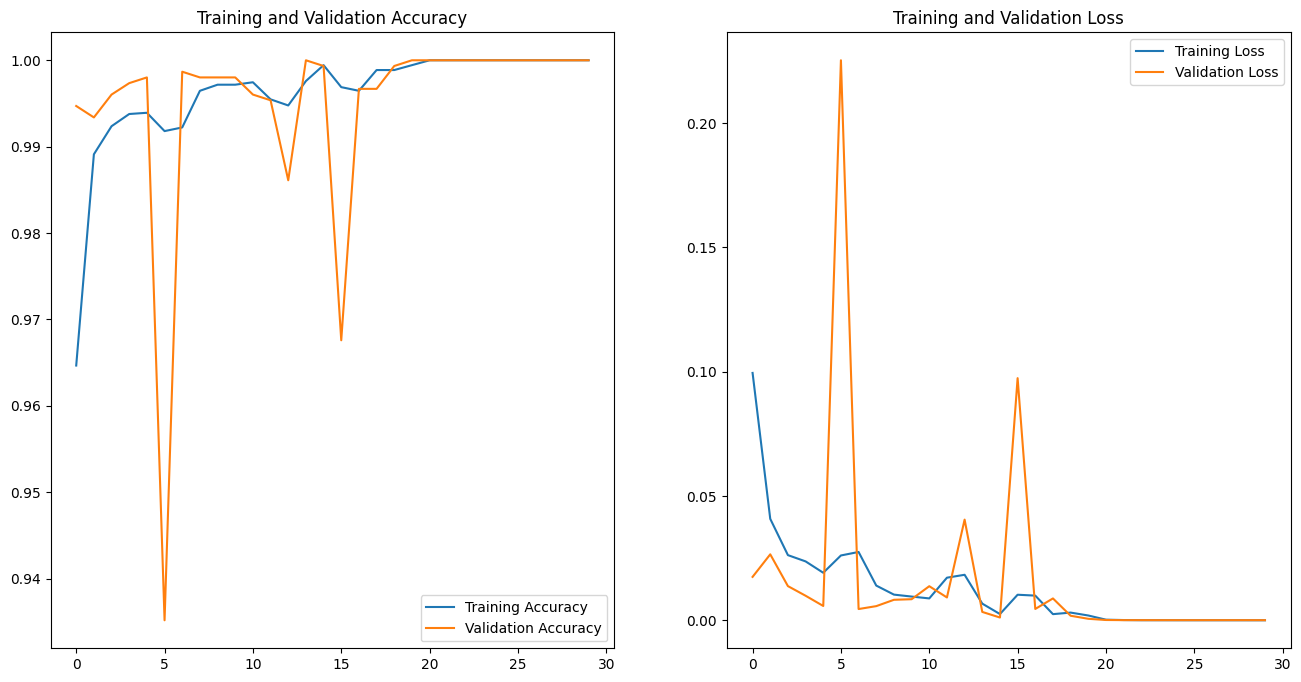

In [15]:
# Plot the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(30)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss[:30], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
tf.keras.models.save_model(model, "isPaddyorNot.h5") 

In [22]:
loaded_model = tf.keras.models.load_model('isPaddyorNot.h5')
print("model Loaded")

model Loaded


In [23]:
test_dir = '/home/local/ZOHOCORP/kishore-pt5635/Desktop/College/PaddyDisease/DataSets/Image_Validation/Train/yes/104442.jpg'
# test_images = os.listdir(test_dir)

In [24]:
yes = 0
no = 0

img = tf.keras.preprocessing.image.load_img(test_dir, target_size=(IMG_SIZE, IMG_SIZE))
img = tf.keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)
images = np.vstack([img])
classes = loaded_model.predict(images, batch_size=10)

print("classes ---> ", classes)
if classes[0]>0.5:
    print("yes ----> ", yes)
else:
    print("no ----> ", no)



1/1 [==============================] - 0s 72ms/step
classes --->  [[1.]]
yes ---->  0


In [19]:
yes = 0
no = 0

for img_name in test_images:
    img = tf.keras.preprocessing.image.load_img(test_dir + img_name, target_size=(IMG_SIZE, IMG_SIZE))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images = np.vstack([img])
    classes = loaded_model.predict(images, batch_size=10)

    print("classes ---> ", classes)
    if classes[0]>0.5:
        yes += 1
    else:
        no += 1

    print(img_name)

print("yes ----> ", yes)
print("no ----> ", no)

1/1 [==============================] - 0s 21ms/step
classes --->  [[1.]]
100001.jpg
1/1 [==============================] - 0s 22ms/step
classes --->  [[1.]]
100002.jpg
1/1 [==============================] - 0s 22ms/step
classes --->  [[1.]]
100003.jpg
1/1 [==============================] - 0s 21ms/step
classes --->  [[1.]]
100004.jpg
1/1 [==============================] - 0s 23ms/step
classes --->  [[1.]]
100005.jpg
1/1 [==============================] - 0s 21ms/step
classes --->  [[1.]]
100006.jpg
1/1 [==============================] - 0s 34ms/step
classes --->  [[1.]]
100007.jpg
1/1 [==============================] - 0s 23ms/step
classes --->  [[1.]]
100008.jpg
1/1 [==============================] - 0s 39ms/step
classes --->  [[1.]]
100009.jpg
1/1 [==============================] - 0s 21ms/step
classes --->  [[1.]]
100010.jpg
1/1 [==============================] - 0s 24ms/step
classes --->  [[1.]]
100011.jpg
1/1 [==============================] - 0s 34ms/step
classes --->  [[1.]]
100